[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
     Neutral       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



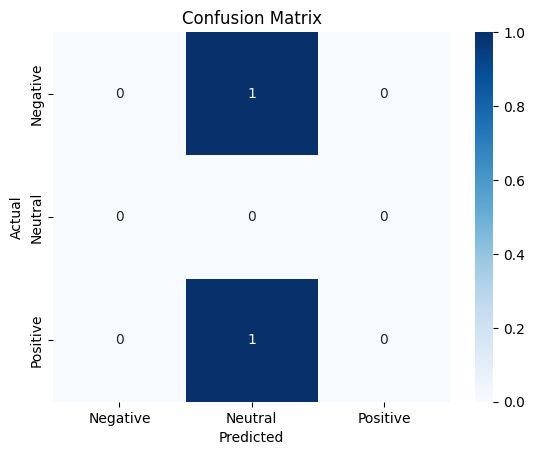

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')

# Sample data
data = {
    'review': [
        "I absolutely loved this film! The story was compelling and the acting superb.",
        "The movie was boring and slow-paced; I wouldn’t recommend it.",
        "It was an okay movie — nothing special but watchable.",
        "Amazing visuals and great plot!",
        "Terrible acting, bad direction, waste of time.",
        "Not bad, could have been better."
    ],
    'sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral']
}
df = pd.DataFrame(data)

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["cleaned"] = df["review"].apply(clean_text)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["cleaned"])
y = df["sentiment"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 262, in

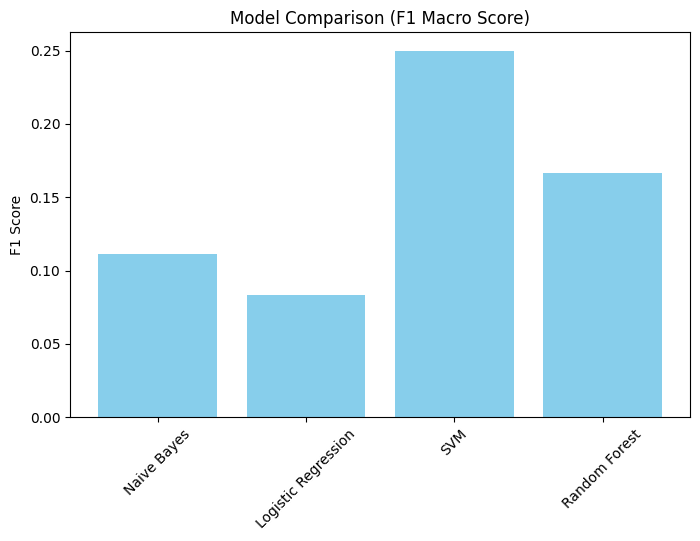

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

scores = {}
for name, model in models.items():
    score = cross_val_score(model, X, y, cv=2, scoring='f1_macro').mean()
    scores[name] = score

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.title("Model Comparison (F1 Macro Score)")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Upsample your dataset to avoid cross-validation errors
df_aug = pd.concat([df] * 5, ignore_index=True)  # Now you have 30 reviews (10 per class)
X_aug = df_aug["cleaned"]
y_aug = df_aug["sentiment"]

# Re-run with the same code but using the augmented data
for name, vec in vectorizers.items():
    X_vec = vec.fit_transform(X_aug)
    model = LogisticRegression(max_iter=200)
    score = cross_val_score(model, X_vec, y_aug, cv=3, scoring='f1_macro').mean()
    print(f"{name} F1 Score: {score:.4f}")

BoW F1 Score: 1.0000
TF-IDF F1 Score: 1.0000


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Compare BoW vs TF-IDF
vectorizers = {
    "BoW": CountVectorizer(ngram_range=(1, 2)),
    "TF-IDF": TfidfVectorizer(ngram_range=(1, 2))
}

for name, vec in vectorizers.items():
    X_vec = vec.fit_transform(df["cleaned"])
    model = LogisticRegression(max_iter=200)
    score = cross_val_score(model, X_vec, y, cv=2, scoring='f1_macro').mean()
    print(f"{name} F1 Score: {score:.4f}")

BoW F1 Score: 0.1667
TF-IDF F1 Score: 0.0833


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


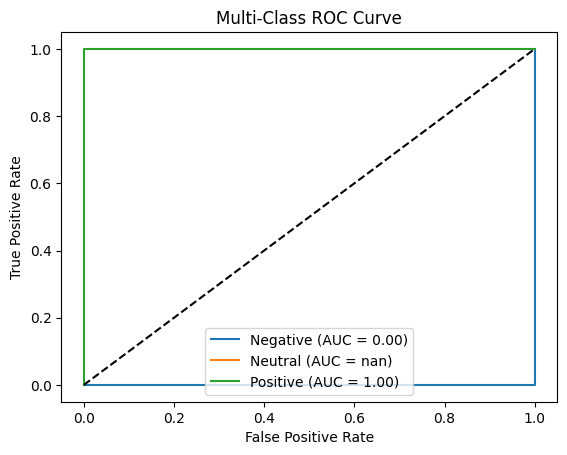

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels to 0,1,2
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Logistic Regression with probability output
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# Evaluate ROC AUC for multi-class
from sklearn.metrics import roc_auc_score, roc_curve

# Binarize y_test for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 0-Negative, 1-Neutral, 2-Positive

# Plot ROC curves
for i, label in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])

param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'tfidf__max_df': [0.8, 1.0],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2']
}

# Upsample your data to avoid fold errors
df_aug = pd.concat([df] * 5, ignore_index=True)  # 30 samples now
y_aug = pd.concat([y] * 5, ignore_index=True)

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid.fit(df_aug['cleaned'], y_aug)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 1)}
Best F1 Score: 1.0
